In [ ]:
using DataFrames,CSV,StatsBase,Distributions,PythonPlot

: 

1.025247562389657

In [156]:
# each cells has a random growth rate but grows to a fixed size
L = 10000
n = 20 # points within cell cycle
dt = 1/(n-1)
a_range = collect(0:dt:1)

m0 = 1
dm = 10
M = [[2.0*m0]]
T = [[0.0]]
for i in 1:L
    mf = M[end][end]/2 + dm + rand(Normal(0,.0001))
    gr = max(0.01,rand(Normal(2,.005)))
    tau = log(mf/m0)/gr
    
    push!(M,exp.(gr .* tau .*a_range) .+rand(Normal(0,.01),n))
    t0 = T[end][end]
    tf = T[end][end]+tau
    push!(T,collect(t0:(tf-t0)/(n-1):tf))
end
M = hcat(M[2:end]...);
T = hcat(T[2:end]...);
Y = log.(M);


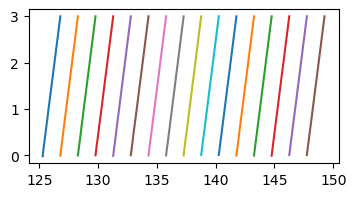

In [157]:
fig,ax = subplots(figsize=(4,2))
for k in 85:100   
    ax.plot(T[:,k],Y[:,k])
end
fig

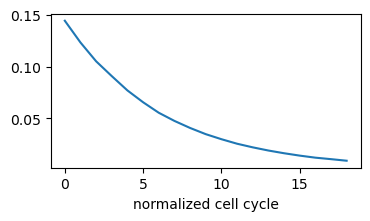

In [159]:
fig,ax = subplots(figsize=(4,2))
ax.plot(sqrt.(var(diff(Y,dims=1)/dt,dims=2) ./mean(diff(Y,dims=1)/dt,dims=2)),"-")
ax.set_xlabel("normalized cell cycle")
ax.set_ylabel("")
fig
